In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("vgsales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
#data cleaning
df = df.drop(columns=['Rank'])
df.rename(columns={ 'NA_Sales': 'America', 'EU_Sales': 'Europe', 'JP_Sales': 'Japan', 'Other_Sales' : 'Other', 'Global_Sales' : 'Global' }, inplace = True)

df['Year'].fillna(0, inplace=True)
df['Year'] = df['Year'].astype('int')

df.set_index('Name', inplace=True)

In [10]:
df.isna().sum()

Platform      0
Year          0
Genre         0
Publisher    58
America       0
Europe        0
Japan         0
Other         0
Global        0
dtype: int64

In [30]:
df.head()

,Name,Platform,Year,Genre,Publisher,America,Europe,Japan,Other,Global
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
n_50 = df.sort_values('Global', ascending=False).head(50)['Global']

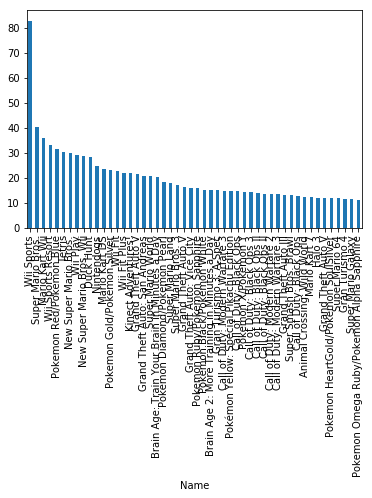

In [6]:
n_50.plot(kind="bar")

In [7]:
n_50.plot(kind = "bar", figsize = (15,6))

In [5]:
df.drop(columns = [df.columns[0]], inplace = True)

In [6]:
platforms = df["Platform"].unique()

<AxesSubplot:xlabel='Platform'>

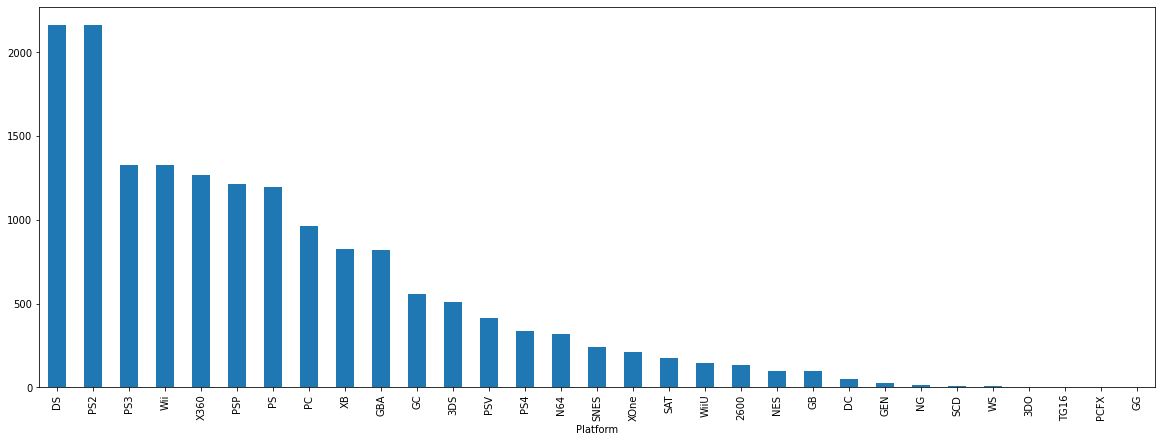

In [7]:
df.groupby('Platform').count().sort_values('Global_Sales')['Global_Sales'][::-1].plot(kind='bar', figsize = (20, 7))


In [8]:
names = df["Name"].unique()

In [10]:
df.groupby('Name').count().sort_values('Year')['Year'][::-1].plot(kind='bar', figsize = (20, 7))


Error in callback <function flush_figures at 0x0000023E65419F70> (for post_execute):


KeyboardInterrupt: 

In [8]:
sales = df["Global_Sales"]

In [9]:
sales_sort = sales.sort_values().head(50)

<AxesSubplot:>

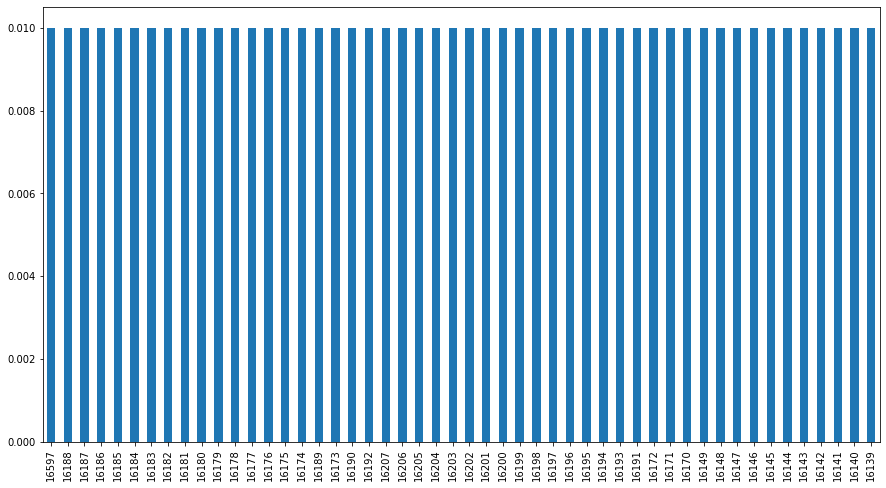

In [10]:
sales_sort.plot(kind = "bar", figsize = (15,8))

In [12]:
f_50 = sales.head(50)

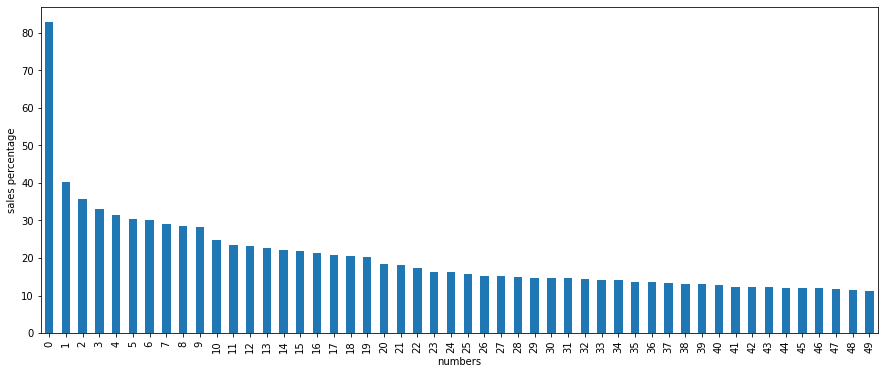

In [15]:
f_50.plot(kind = "bar", figsize = (15,6))
plt.xlabel("numbers")
plt.ylabel("sales percentage")
plt.show()

In [23]:
df[df["Platform" ]== "PS4"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
44,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
93,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.60
...,...,...,...,...,...,...,...,...,...,...
16220,Dynasty Warriors: Eiketsuden,PS4,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16260,Paragon,PS4,2016.0,Action,Epic Games,0.01,0.00,0.00,0.00,0.01
16333,Chaos;Child,PS4,2015.0,Adventure,5pb,0.00,0.00,0.01,0.00,0.01
16550,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01


In [54]:
action = df[df["Genre"]== "Action"].head(50)

<AxesSubplot:>

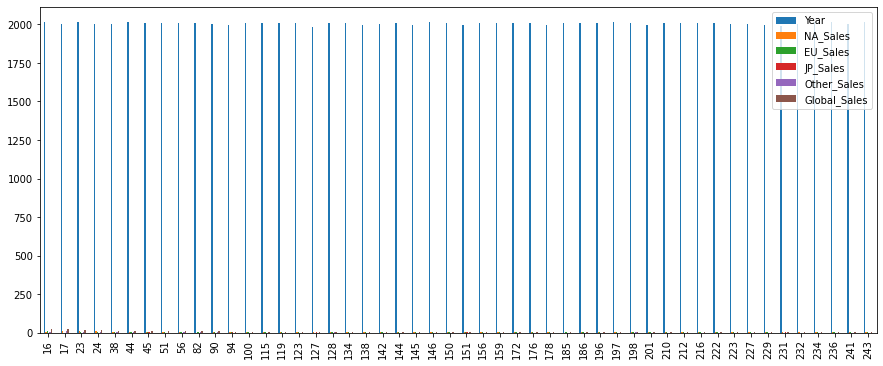

In [55]:
action.plot(kind = "bar",figsize = (15,6))

In [50]:
genre = df.groupby("Genre").head(50)

<AxesSubplot:>

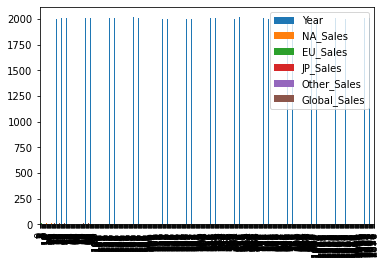

In [45]:
genre.plot(kind = "bar")

In [65]:
y_2015 = df[df["Year"]== 2015].head(50)

In [66]:
y_2015

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
101,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
109,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
235,Splatoon,WiiU,2015.0,Shooter,Nintendo,1.55,1.15,1.44,0.43,4.57
243,Uncharted: The Nathan Drake Collection,PS4,2015.0,Action,Sony Computer Entertainment,1.96,1.69,0.08,0.74,4.47
260,Halo 5: Guardians,XOne,2015.0,Shooter,Microsoft Game Studios,2.64,1.20,0.03,0.39,4.26
287,Fallout 4,XOne,2015.0,Role-Playing,Bethesda Softworks,2.45,1.26,0.01,0.37,4.09
314,NBA 2K16,PS4,2015.0,Sports,Take-Two Interactive,2.48,0.65,0.03,0.69,3.85


<AxesSubplot:>

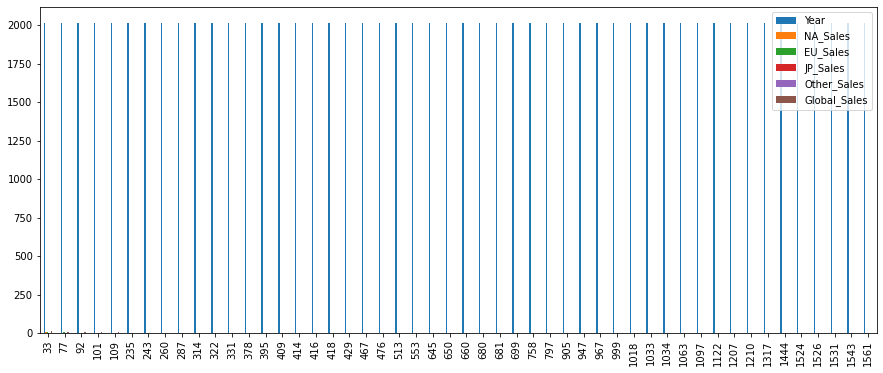

In [63]:
y_2015.plot(kind = "bar", figsize = (15,6))

In [12]:
df.groupby('Year').count()['Genre'][1:]

Year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     349
2001     482
2002     829
2003     775
2004     763
2005     941
2006    1008
2007    1202
2008    1428
2009    1431
2010    1259
2011    1139
2012     657
2013     546
2014     582
2015     614
2016     344
2017       3
2020       1
Name: Genre, dtype: int64

In [11]:
df['Year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000,    0, 1995, 2016,
       1991, 1981, 1987, 1980, 1983, 2020, 2017])